In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm

In [3]:
!pip install islp

In [13]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize , poly)


In [5]:
data = pd.read_csv('Books.zip')

In [6]:
data.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [7]:
data.sort_index()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


<Axes: xlabel='average_rating', ylabel='books_count'>

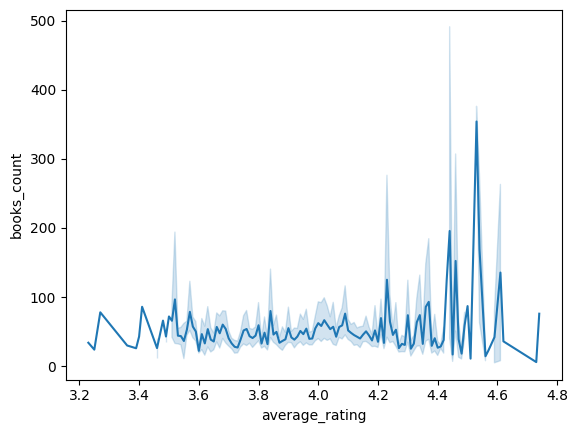

In [8]:
sns.lineplot(data, x = "average_rating", y = "books_count")

In [9]:
x = pd.DataFrame({'intercept': np.ones(data.shape[0]),
                  'average_rating': data['average_rating']})
x[:10]

,intercept,average_rating
0,1.0,4.34
1,1.0,4.44
2,1.0,3.57
3,1.0,4.26
4,1.0,4.24
5,1.0,4.30
6,1.0,4.53
7,1.0,4.03
8,1.0,4.46
9,1.0,4.37


In [10]:
y = data['books_count']
model = sm.OLS(x, y)
results = model.fit()

In [30]:
import design

ModuleNotFoundError: No module named 'design'

In [22]:
new_data = pd.DataFrame({'lstat':[5,10,15]})
newX = design.transform(new_data)
newX

NameError: name 'design' is not defined

In [25]:
new_predictions = results.get_prediction();
new_predictions.predicted_mean

ValueError: shapes (1354,2) and (1354,2) not aligned: 2 (dim 1) != 1354 (dim 0)

My machine learning project compares the average rating given to popular books as well as the sales of books. My code should hopefuly be able to predict how many copies of each book will be sold based on the rating given to the book.

In [26]:
def abline(ax, b, m, *args, **kwargs):
#"Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim)

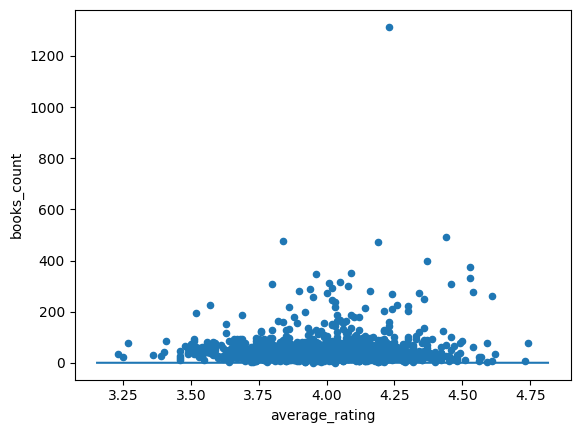

In [27]:
ax = data.plot.scatter('average_rating', 'books_count')
abline(ax,
  results.params[0],
  results.params[1], 'r--',
       linewidth=3)

ValueError: shapes (1354,2) and (1354,2) not aligned: 2 (dim 1) != 1354 (dim 0)

Let's step back and analyze this one more time. Given that you are looking at prices you can think as yourself as the author trying to sell his/her book or even getting ready to write your first book.
Comparing rates and looking at popular book do not give you insight on the price right?   
You always want to give an insight someone could not guess just by paying attention to the question. Because clearly popular book will sell more and have a higher average rating.    
*   I suggest going deeper and looking at what affect the price of a book. to do that it is the same process as predicting prices but then you can select the parameter with a high coefficient.

*  I can  show you the steps for this.




